In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import levene
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.graphics.gofplots import qqplot


In [2]:
df = pd.read_csv("Gender-Pay-Gap.csv")
df


,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [3]:
# Check for missing values and drop rows with missing values (if any)
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Ensure data types are correct (convert columns if necessary)
# For example, if 'Age' should be an integer, ensure it's correctly typed
df['Age'] = df['Age'].astype(int)

# Handle outliers (example: remove rows with BasePay or Bonus beyond a reasonable range)
df = df[(df['BasePay'] > 0) & (df['Bonus'] > 0)]

# Create Total Salary column by summing BasePay and Bonus
df['TotalSalary'] = df['BasePay'] + df['Bonus']

df['Dept'] = df['Dept'].astype('category')

# Standardize column names (optional, e.g., make all lowercase)
df.columns = df.columns.str.lower()

# Display the cleaned dataset
df

,jobtitle,gender,age,perfeval,education,dept,seniority,basepay,bonus,totalsalary
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601


In [4]:
# ------------------ Multiple Linear Regression ------------------
# Fit the MLR model
# We'll use gender, job level (seniority), age, and department to predict salary
model = ols('totalsalary ~ C(gender) + C(seniority) + age + C(dept)', data=df).fit()

In [5]:
# Display summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            totalsalary   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     168.1
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          1.93e-205
Time:                        17:43:32   Log-Likelihood:                -11055.
No. Observations:                1000   AIC:                         2.213e+04
Df Residuals:                     989   BIC:                         2.219e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.36

In [ ]:
# ------------------ Assumption Checks ------------------

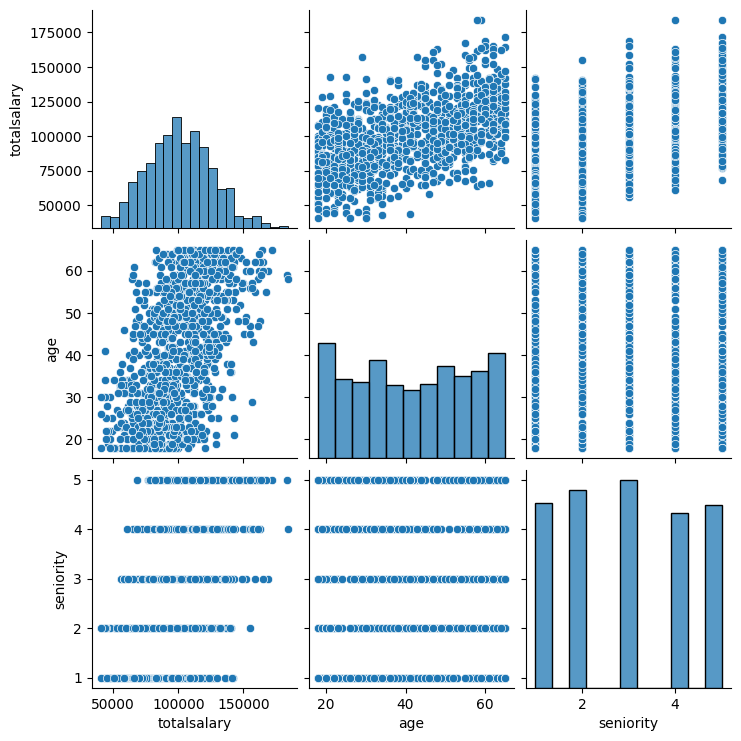

In [6]:

# 1. Linearity: Check via scatterplot of each independent variable vs TotalSalary
sns.pairplot(df[['totalsalary', 'age', 'seniority', 'gender']])
plt.show()

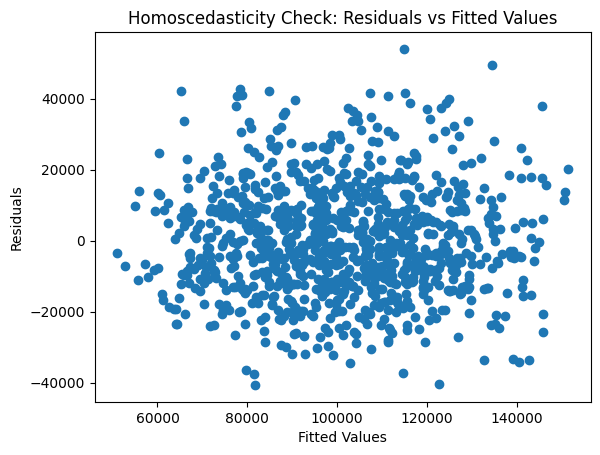

In [7]:
# 2. Homoscedasticity: Plot residuals vs fitted values
fitted_vals = model.fittedvalues
residuals = model.resid
plt.scatter(fitted_vals, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Residuals vs Fitted Values')
plt.show()

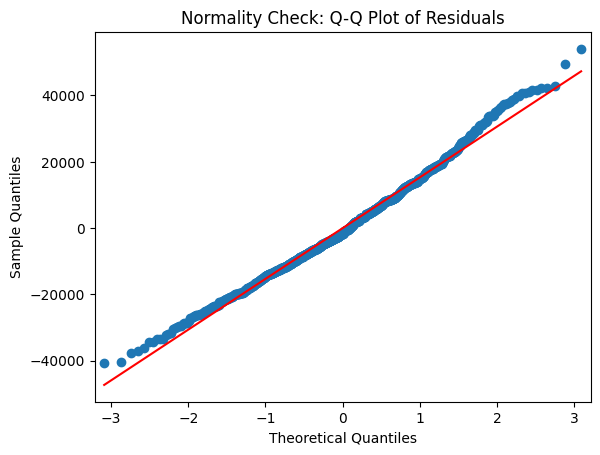

In [8]:
# 3. Normality of residuals: Use Q-Q plot
qqplot(residuals, line='s')
plt.title('Normality Check: Q-Q Plot of Residuals')
plt.show()

In [10]:
# Perform the normality test (Anderson-Darling test for residuals)
ad_statistic, ad_significance_level = normal_ad(residuals)
print(f"Normality Test (Anderson-Darling) Statistic: {ad_statistic}, Significance Level: {ad_significance_level}")


Normality Test (Anderson-Darling) Statistic: 2.1720007491018123, Significance Level: 1.6245396971697394e-05


In [12]:

# ------------------ Post-Hoc Test (if Gender is significant) ------------------
# If gender is significant, we can explore its interaction with job level or age
# For simplicity, assume gender is significant, and we can run interaction terms
interaction_model = ols('totalsalary ~ C(gender) * C(seniority) + age + C(dept)', data=df).fit()


In [13]:
# ANOVA table for the interaction model
anova_results = anova_lm(interaction_model, typ=2)
print("\nANOVA Results for Interaction Model:")
print(anova_results)


ANOVA Results for Interaction Model:
                              sum_sq     df           F         PR(>F)
C(gender)               2.453898e+10    1.0  103.620103   3.292170e-23
C(seniority)            1.878164e+11    4.0  198.271855  1.021372e-124
C(dept)                 6.426574e+09    4.0    6.784331   2.184519e-05
C(gender):C(seniority)  8.819225e+08    4.0    0.931018   4.451051e-01
age                     1.900921e+11    1.0  802.697040  1.233196e-129
Residual                2.332645e+11  985.0         NaN            NaN
